<a href="https://colab.research.google.com/github/kskola/fraud-prediction/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

add dataset

In [ ]:
df = pd.read_csv('/content/stroke_data.csv')

In [ ]:
df = df.dropna()
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


Visualizing the data


*   count the total positive and negative stroke presence

*   To visualize the distribution of numerical features.



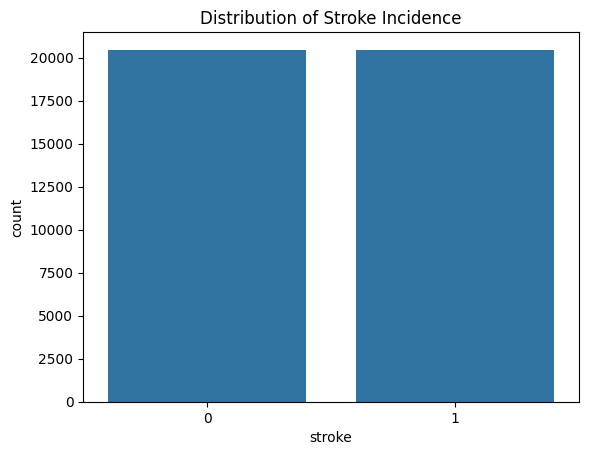

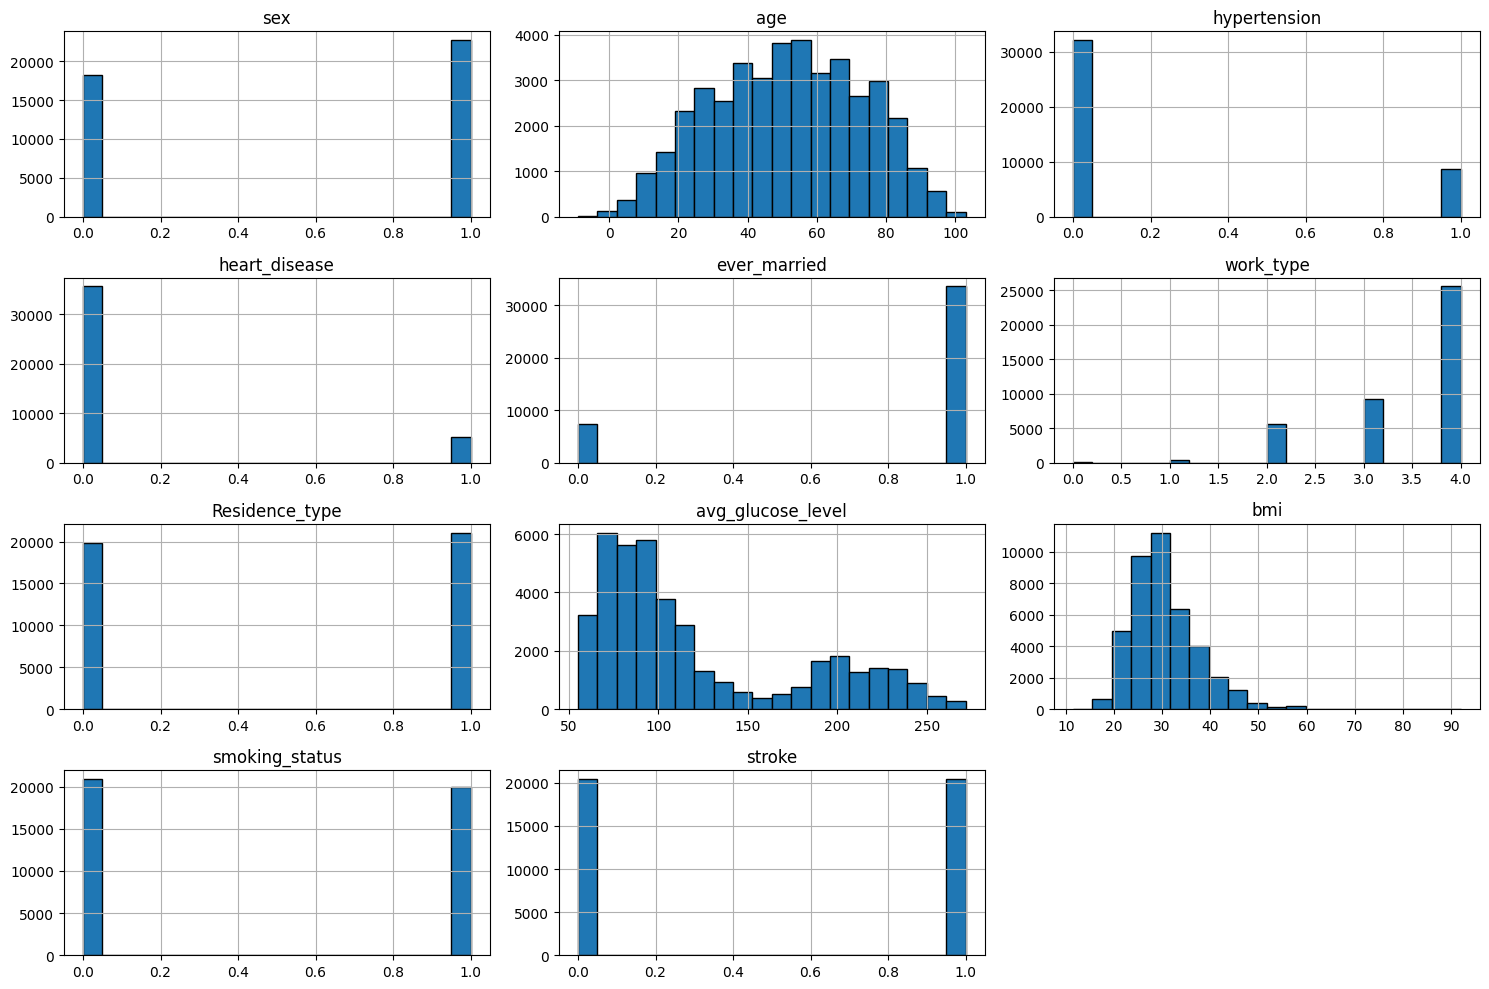

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Incidence')
plt.show()

df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()



To show the correlation between different features in the dataset.

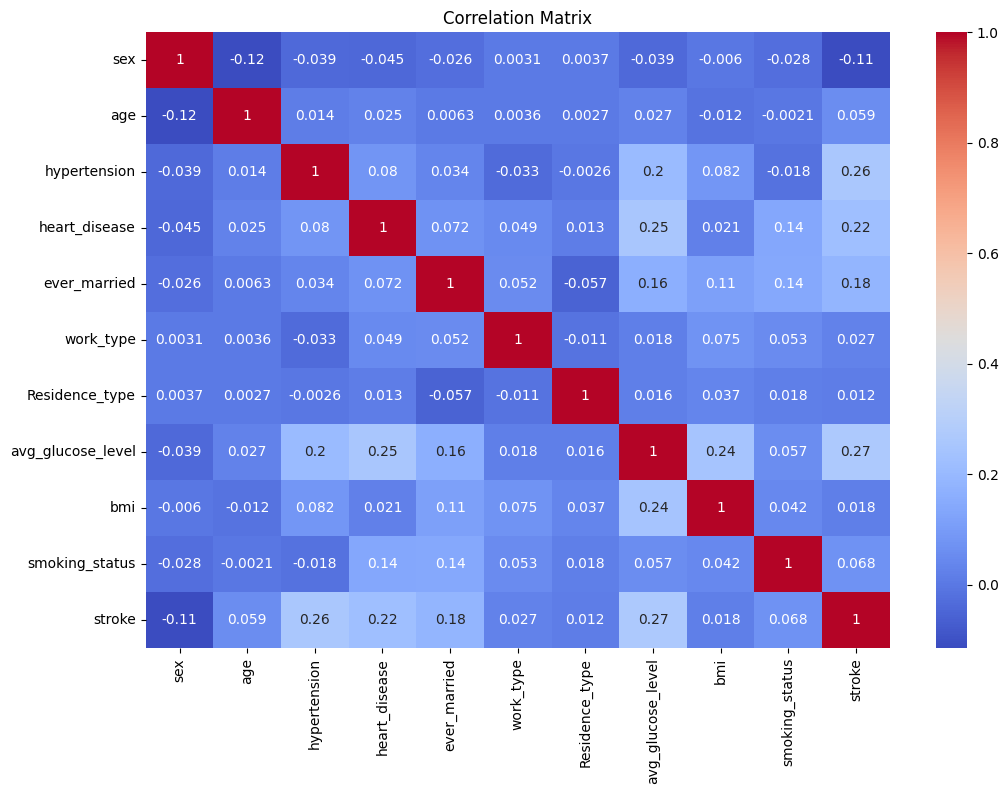

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

futher analysing the dataset

In [ ]:
# Calculate the mean age of the patients
mean_age = df['age'].mean()
print(f'Mean age of patients: {mean_age}')

# Calculate the standard deviation of the age
std_age = df['age'].std()
print(f'Standard deviation of age: {std_age}')

# Calculate the percentage of patients with hypertension
percent_hypertension = (df['hypertension'].sum() / len(df)) * 100
print(f'Percentage of patients with hypertension: {percent_hypertension:.2f}%')

# Calculate the percentage of patients with heart disease
percent_heart_disease = (df['heart_disease'].sum() / len(df)) * 100
print(f'Percentage of patients with heart disease: {percent_heart_disease:.2f}%')

# Calculate the percentage of smokers
percent_smokers = (df['smoking_status'] == 1).sum() / len(df) * 100
print(f'Percentage of smokers: {percent_smokers:.2f}%')

# Calculate the average of the average glucose level
mean_avg_glucose_level = df['avg_glucose_level'].mean()
print(f'Average of average glucose level: {mean_avg_glucose_level}')

# Calculate the standard deviation of the average glucose level
std_avg_glucose_level = df['avg_glucose_level'].std()
print(f'Standard deviation of average glucose level: {std_avg_glucose_level}')

gender_counts = df['sex'].value_counts(normalize=True) * 100
male_percentage = gender_counts.get(1, 0)
female_percentage = gender_counts.get(0, 0)

print(f"Percentage of Male Patients: {male_percentage}%")
print(f"Percentage of Female Patients: {female_percentage}%")

Mean age of patients: 51.32730339550688
Standard deviation of age: 21.624170974238968
Percentage of patients with hypertension: 21.39%
Percentage of patients with heart disease: 12.77%
Percentage of smokers: 48.86%
Average of average glucose level: 122.07967878358227
Standard deviation of average glucose level: 57.56195117070071
Percentage of Male Patients: 55.51617082650891%
Percentage of Female Patients: 44.48382917349109%




1. creating model

1.   Select features (X) and target variable (y)

1.   Split the data into training and testing sets (80% train, 20% test)
2.   Initialize the Random Forest classifier


5.   Train the classifier on the training data


6.   Make predictions on the test data



In [ ]:

model = RandomForestClassifier()


X = df[['sex','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y = df['stroke']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_proba = model.predict_proba(X_test)[:, 1]

classification report

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6147
           1       0.99      1.00      1.00      6126

    accuracy                           1.00     12273
   macro avg       1.00      1.00      1.00     12273
weighted avg       1.00      1.00      1.00     12273



Model evaluation

*   To visualize the performance of the classification model.
*   feature importances visualization


*   ROC Curve
*   Precision-Recall Curve





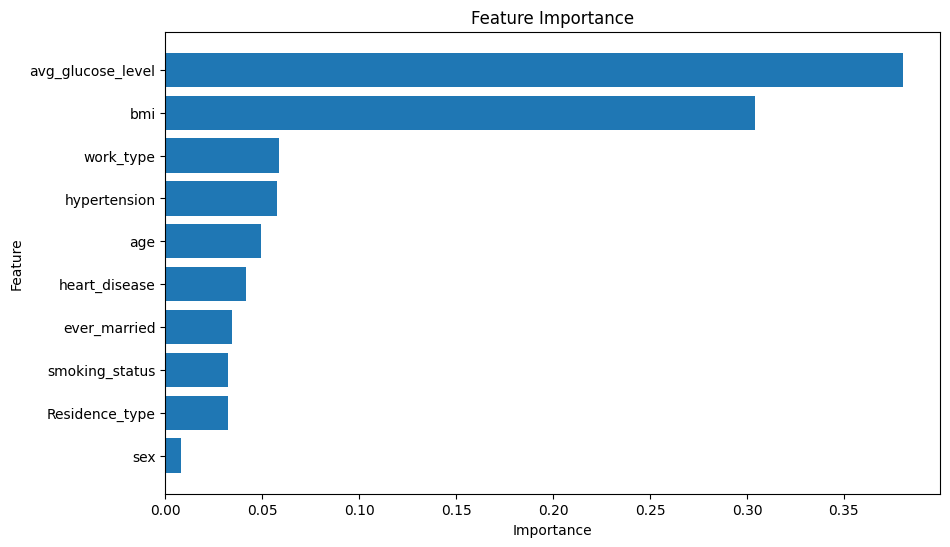

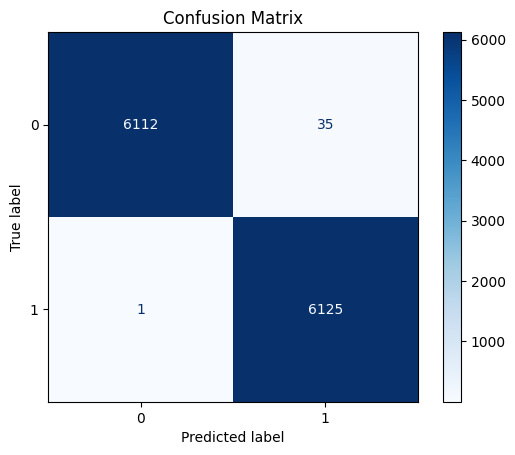

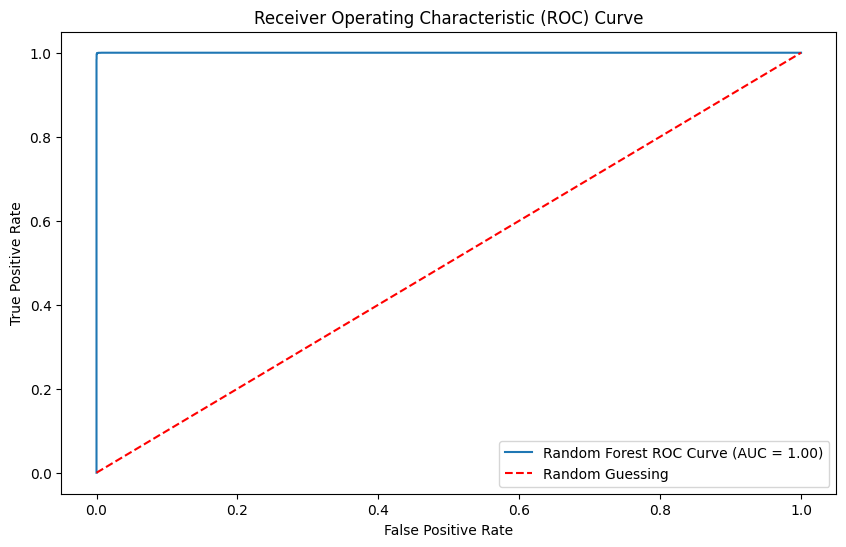

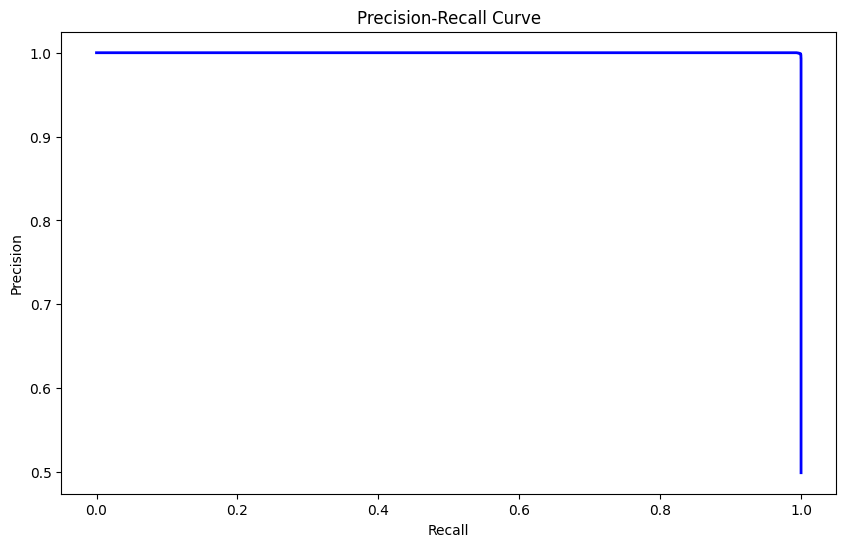

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

make a sample prediction

In [ ]:
new_patient = [[1, 85.0, 0, 0, 1, 4, 1, 186.21, 28.0, 1]]  # Example new patient data
new_patient = np.array(new_patient)
prediction = clf.predict(new_patient)
if prediction[0] == 1:
    print('Prediction: The patient is likely to have a stroke.')
else:
    print('Prediction:The patient is not likely to have a stroke.')

Prediction: The patient is likely to have a stroke.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
